# Image distinguishment between Japanese and Chinese using Deep Learning

## Objective:
### This project will use a deep learning algorithm to create a Chinese vs Japanese image recognition system. The system will be trained on a dataset of images of Chinese and Japanese people, and will be able to identify which nationality a given image belongs to.
#### The Layers used were: Conv2D, MaxPooling2D, Dense, Flatten, Dropout


###### Authors: Omar Mohamed Abdelsalam, and Magdy Abdullah Eissa


# 1. Importing and Filtering Images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 2. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 129 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

(array([[[[ 17.369598  ,   0.70944214,   0.70944214],
          [ 30.376663  ,   9.239944  ,   4.171585  ],
          [ 50.218582  ,  17.386887  ,   8.431976  ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ]],
 
         [[ 10.443069  ,   0.90849304,   4.7622986 ],
          [ 16.391708  ,   1.3292084 ,   1.8828125 ],
          [ 19.968307  ,   6.376953  ,   5.240738  ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ]],
 
         [[ 11.        ,   3.        ,   1.        ],
          [ 11.        ,   3.        ,   1.        ],
          [ 11.680527  ,   2.3194733 ,   0.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.  

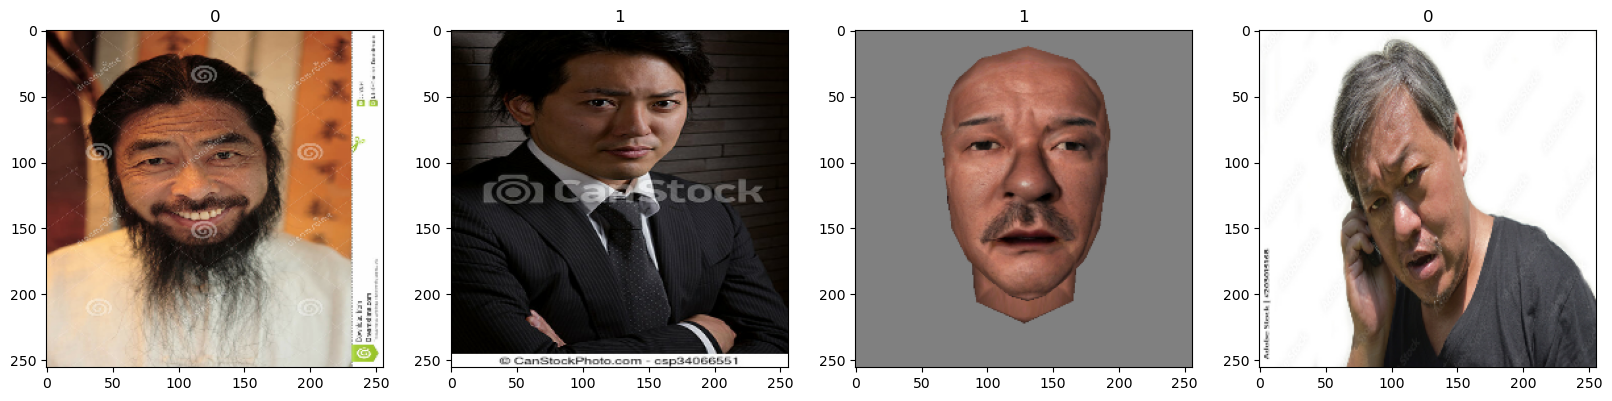

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# 3. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.78707105, 0.6576593 , 0.4458946 ],
          [0.781924  , 0.6603554 , 0.4485907 ],
          [0.7840074 , 0.6585172 , 0.45851716],
          ...,
          [0.7420343 , 0.66360295, 0.5185049 ],
          [0.73498774, 0.65655637, 0.51145834],
          [0.73492646, 0.6564951 , 0.51139706]],
 
         [[0.7865196 , 0.65710783, 0.4492647 ],
          [0.77916664, 0.65661764, 0.4477941 ],
          [0.7776348 , 0.6521446 , 0.4521446 ],
          ...,
          [0.7257966 , 0.6473652 , 0.5022672 ],
          [0.72518384, 0.6467525 , 0.5016544 ],
          [0.7270833 , 0.64865196, 0.5035539 ]],
 
         [[0.7826593 , 0.65324754, 0.45128676],
          [0.7862745 , 0.6578431 , 0.45784312],
          [0.785049  , 0.65955883, 0.4595588 ],
          ...,
          [0.72996324, 0.6515319 , 0.50643384],
          [0.71482843, 0.63639706, 0.49129903],
          [0.7151348 , 0.63670343, 0.4916054 ]],
 
         ...,
 
         [[0.9943628 , 0.9985907 , 0.98946077],
          [0.99362

# 4. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

3

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Build Deep Learning Model

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #CNN layers

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 6. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 6s 2s/step - loss: 1.2266 - accuracy: 0.3958 - val_loss: 0.6792 - val_accuracy: 0.5938
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.7016 - accuracy: 0.4583 - val_loss: 0.6789 - val_accuracy: 0.5938
Epoch 3/20
3/3 [==============================] - 5s 2s/step - loss: 0.6883 - accuracy: 0.5312 - val_loss: 0.6867 - val_accuracy: 0.5625
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.6871 - accuracy: 0.5729 - val_loss: 0.6873 - val_accuracy: 0.4375
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.6879 - accuracy: 0.5417 - val_loss: 0.6580 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 7s 2s/step - loss: 0.6585 - accuracy: 0.7812 - val_loss: 0.6423 - val_accuracy: 0.8438
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.6334 - accuracy: 0.7812 - val_loss: 0.6050 - val_accuracy: 0.7500
Epoch 8/20
3/3 [=========================

# 7. Plot Performance

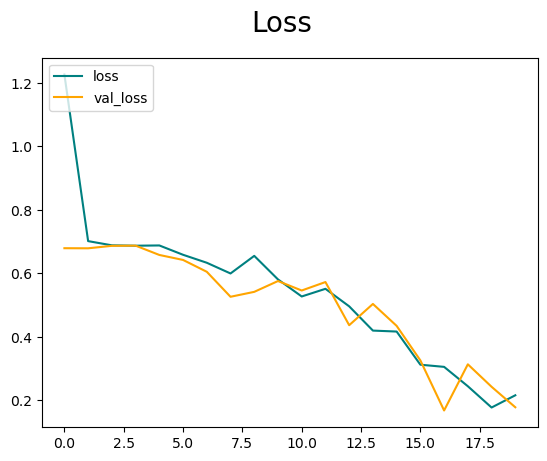

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

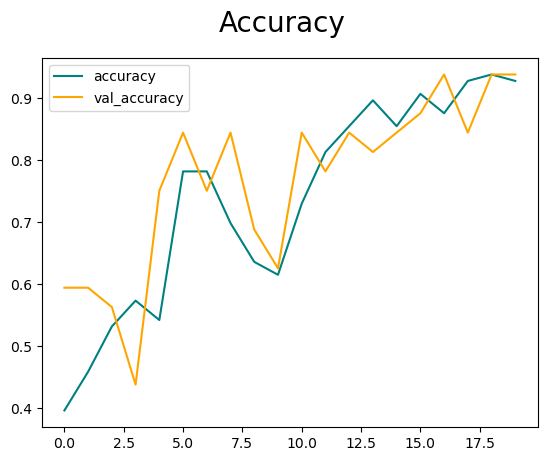

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 9. Test

In [48]:
import cv2

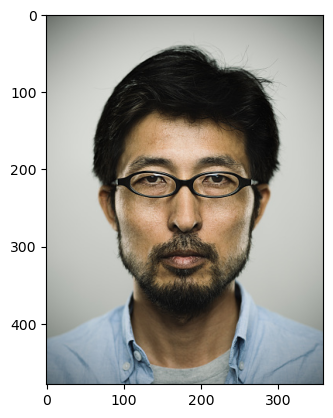

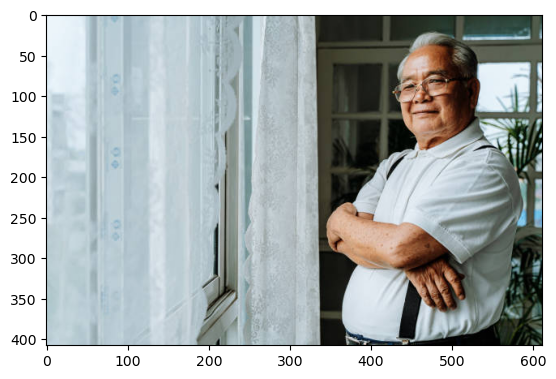

In [56]:
img = cv2.imread('japanesetest.jpg')

img = plt.imread("/Users/abdel/OneDrive/Desktop/Projects/11-23-2022/japanesetest.jpg")

plt.imshow(img)
plt.show()

img2 = cv2.imread('chinesetest.jpg')

img2 = plt.imread("/Users/abdel/OneDrive/Desktop/Projects/11-23-2022/chinesetest.jpg")

plt.imshow(img2)
plt.show()

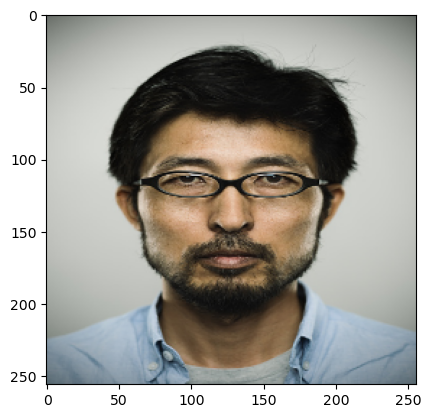

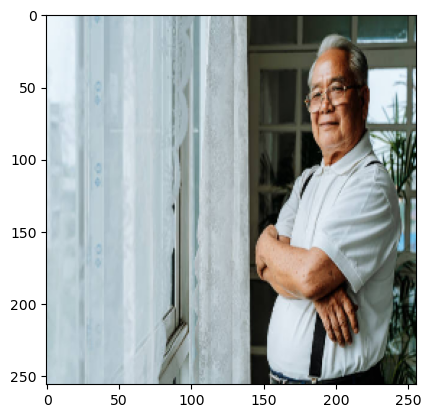

In [65]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))

yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 [==============================] - 0s 43ms/step


In [67]:
yhat
yhat2

array([[0.29301393]], dtype=float32)

In [76]:
if yhat > 0.5: 
    print(f'Predicted class is Japanese')
else:
    print(f'Predicted class is Chinese')
    
if yhat2 > 0.5: 
    print(f'Predicted class is Japanese')
else:
    print(f'Predicted class is Chinese')

Predicted class is Japanese
Predicted class is Chinese


# 10. Save the Model

In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save(os.path.join('models','imageclassifier.h5'))

In [79]:
new_model = load_model('imageclassifier.h5')

In [64]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 48ms/step


array([[0.35070533]], dtype=float32)

# Finish


# Credit
Nicholas Renotte (https://www.youtube.com/watch?v=jztwpsIzEGc)
